> A time series analysis will be done to understand the correlation between daily new cases and goverment policies.

In [1]:
# Install required packages
# !python -m pip install numpy
# !python -m pip install "pandas>=1.1.0"
# !python -m pip install scikit-learn
# !python -m pip install matplotlib

# Visualization
%matplotlib inline

In [2]:
# Data I/O, cleaning
import pandas as pd

# Model
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

# Model selection
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# TODO: the loaded dataset is generated form the data_cleaning.ipynb, so you have to do it first.
owid_oxcgrt = pd.read_csv("../data/owid_oxcgrt_merged.csv")
owid_oxcgrt.head()

,countrycode_date_str,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,isBig.1
0,AFG;20200224,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
1,AFG;20200225,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
2,AFG;20200226,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
3,AFG;20200227,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
4,AFG;20200228,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False


In [4]:
features_for_train = [
    # 'iso_code',
    # 'continent',
    # 'location',
    # 'date',        # As index
    # 'total_cases',
    # 'new_cases',
    # 'new_cases_smoothed',
    # 'total_deaths',
    # 'new_deaths',
    # 'new_deaths_smoothed',
    # 'total_cases_per_million',
    'new_cases_per_million',
    # 'new_cases_smoothed_per_million',
    # 'total_deaths_per_million',
    # 'new_deaths_per_million',
    # 'new_deaths_smoothed_per_million',
    # 'reproduction_rate',
    # 'icu_patients',
    # 'icu_patients_per_million',
    # 'hosp_patients',
    # 'hosp_patients_per_million',
    # 'weekly_icu_admissions',
    # 'weekly_icu_admissions_per_million',
    # 'weekly_hosp_admissions',
    # 'weekly_hosp_admissions_per_million',
    # 'new_tests',
    # 'total_tests',
    # 'total_tests_per_thousand',
    # 'new_tests_per_thousand',
    # 'new_tests_smoothed',
    # 'new_tests_smoothed_per_thousand',
    # 'positive_rate',
    # 'tests_per_case',
    # 'tests_units',
    # 'total_vaccinations',
    # 'people_vaccinated',
    # 'people_fully_vaccinated',
    # 'new_vaccinations',
    # 'new_vaccinations_smoothed',
    # 'total_vaccinations_per_hundred',
    # 'people_vaccinated_per_hundred',
    # 'people_fully_vaccinated_per_hundred',
    # 'new_vaccinations_smoothed_per_million',
    # 'stringency_index',
    # 'population',
    # 'population_density',
    # 'median_age',
    # 'aged_65_older',
    # 'aged_70_older',
    # 'gdp_per_capita',
    # 'extreme_poverty',
    # 'cardiovasc_death_rate',
    # 'diabetes_prevalence',
    # 'female_smokers',
    # 'male_smokers',
    # 'handwashing_facilities',
    # 'hospital_beds_per_thousand',
    # 'life_expectancy',
    # 'human_development_index',
    # 'date_str',
    # 'isBig',
    # 'CountryCode',
    # 'RegionName',
    # 'RegionCode',
    # 'Jurisdiction',
    # 'Date',
    # 'C1_School closing',
    # 'C1_Flag',
    # 'C2_Workplace closing',
    # 'C2_Flag',
    # 'C3_Cancel public events',
    # 'C3_Flag',
    # 'C4_Restrictions on gatherings',
    # 'C4_Flag',
    # 'C5_Close public transport',
    # 'C5_Flag',
    # 'C6_Stay at home requirements',
    # 'C6_Flag',
    # 'C7_Restrictions on internal movement',
    # 'C7_Flag',
    # 'C8_International travel controls',
    # 'E1_Income support',
    # 'E1_Flag',
    # 'E2_Debt/contract relief',
    # 'E3_Fiscal measures',
    # 'E4_International support',
    # 'H1_Public information campaigns',
    # 'H1_Flag',
    # 'H2_Testing policy',
    # 'H3_Contact tracing',
    # 'H4_Emergency investment in healthcare',
    # 'H5_Investment in vaccines',
    # 'H6_Facial Coverings',
    # 'H6_Flag',
    # 'H7_Vaccination policy',
    # 'H7_Flag',
    # 'H8_Protection of elderly people',
    # 'H8_Flag',
    # 'M1_Wildcard',
    # 'ConfirmedCases',
    # 'ConfirmedDeaths',
     'StringencyIndex',
    # 'StringencyIndexForDisplay',
     'StringencyLegacyIndex',
    # 'StringencyLegacyIndexForDisplay',
     'GovernmentResponseIndex',
    # 'GovernmentResponseIndexForDisplay',
     'ContainmentHealthIndex',
    # 'ContainmentHealthIndexForDisplay',
     'EconomicSupportIndex',
    # 'EconomicSupportIndexForDisplay',
]

## Model training 
The model will be constructed using scikit-learn. Here we use RandomForestRegressor as our response variables are continues (nr of new daily casees), and the predictors are combination of continues and discrete variables.

### Response variable
Our aim is to predict new daily cases. The corresponding variable in the OWID data set is *new_cases_per_million*

### Predictor variables
To understand the effects of goverment policies, *StringencyIndex, StringencyLegacyIndex, GovernmentResponseIndex, ContainmentHealthIndex*, and *EconomicSupportIndex* were used as predictor variables.

### Training and testing sets
90% of the data will be used as training set and the rest 10% was left for test.
A time-series way is planned, then the training and test set was not splited randomly but based on the date.

In [5]:
def pickup_country_data(dataset,
                        iso_code="DNK",
                        resp_var="new_cases_per_million",
                        pred_vars=None,
                        scale_resp_var=5):
    """Subset a data set for a given country."""
    if pred_vars is None:
        pred_vars = list(dataset.columns)

    country = dataset.loc[dataset.loc[:, "iso_code"] == iso_code, set(["date"] + pred_vars)]

    # Prepare for a time series analysis
    country.date = pd.to_datetime(country['date'])
    country = country.set_index("date").loc[:, :].dropna(subset=[resp_var])
    country[resp_var] = country.loc[:, resp_var].apply(lambda x: x/scale_resp_var)
    
    return country


def split_train_test(dataset, train_ratio=0.9, resp_var="new_cases_per_million"):
    """Split the dataset into train and test for at time-series analysis."""
    # Split dataset into X and y.
    all_vars = list(dataset.columns)
    all_vars.remove(resp_var)
    
    x_matrix, y_vector = country.loc[:, all_vars], country.loc[:, resp_var]

    # Fill NAs with zeros. This is very simple and naive.
    x_matrix = x_matrix.fillna(0)

    # Split dataset in to training and testing using 9:1 odds ratio
    delimiter_time_point = x_matrix.index[int(len(x_matrix.index) * 0.9)]
    x_train = x_matrix.loc[:delimiter_time_point, :]
    y_train = y_vector.loc[:delimiter_time_point]
    x_test = x_matrix.loc[delimiter_time_point:, :]
    y_test = y_vector.loc[delimiter_time_point:]
    
    return x_train, y_train, x_test, y_test


# Training the model
def train(model, x_train, y_train):
    """Train the model using random haperparameter searching."""
    # Search the hyperparameters in the following domain randomly.
    param_domain = {
        "n_estimators": [n for n in range(20, 100)],
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": [d for d in range(5, 15)]
    }

    # Split dataset in to different CVs using forward chaining way.
    time_series_cv = TimeSeriesSplit(n_splits=10)

    # Setup the searcher and fit the model to trainig dataset.
    random_searcher = RandomizedSearchCV(estimator=model, param_distributions=param_domain,
                                         scoring="explained_variance", cv=time_series_cv)
    random_searcher.fit(x_train, y_train)

    # Best score and best model
    best_score = random_searcher.best_score_
    best_model = random_searcher.best_estimator_

    # Show some simple scores.
    print("------ Train -------")
    print("Best score: {}".format(best_score))
    print("Best model: {}".format(best_model))
    
    return (best_score, best_model)


def predict(model, x_test, y_test):
    """Predict the test data and assess the model by several evaluation the prediction."""
    # Test the best model from RandomSearchCV
    y_true = y_test.values
    y_pred = model.predict(x_test)

    evs = explained_variance_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2s = r2_score(y_true, y_pred)
    mxe = max_error(y_true, y_pred)
    
    print("------ Test -------")
    print("R-sequare score:    {}".format(r2s),
          "Explained variace:  {}".format(evs),
          "Mean squared error: {}".format(mse),
          "Max residual error: {}".format(mxe), sep="\n")
    
    return dict(evs=evs, mse=mse, r2s=r2s, mxe=mxe)

In [6]:
for country_code in ["DNK", "FIN", "SWE", "RUS", "BLR", "UKR", "MDA"]:
    country = pickup_country_data(owid_oxcgrt, country_code, pred_vars=features_for_train)
    x_train, y_train, x_test, y_test = split_train_test(country)
    
    model = RandomForestRegressor()
    print("The model for {}: ".format(country_code))
    best_score, best_model = train(model, x_train, y_train)
    eval_matrices = predict(best_model, x_test, y_test)
    print("---\n")

The model for DNK: 
------ Train -------
Best score: -0.3976986689913281
Best model: RandomForestRegressor(max_depth=6, max_features='log2', n_estimators=40)
------ Test -------
R-sequare score:    -0.06082091618882046
Explained variace:  -0.027178476936947193
Mean squared error: 250.00518889650553
Max residual error: 89.461368367102
---

The model for FIN: 
------ Train -------
Best score: -0.16453909005509768
Best model: RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=31)
------ Test -------
R-sequare score:    0.07519550066089986
Explained variace:  0.07539586648591501
Mean squared error: 53.704929164139486
Max residual error: 17.421518640630218
---

The model for SWE: 
------ Train -------
Best score: -0.019754101484276122
Best model: RandomForestRegressor(max_depth=9, n_estimators=21)
------ Test -------
R-sequare score:    -0.012401327399035988
Explained variace:  -0.008828855605358177
Mean squared error: 13179.6826914851
Max residual error: 338.205961111111

*The model does work at all. Why?* Let's pick up one country as an example.

<AxesSubplot:title={'center':'MDA'}, xlabel='date'>

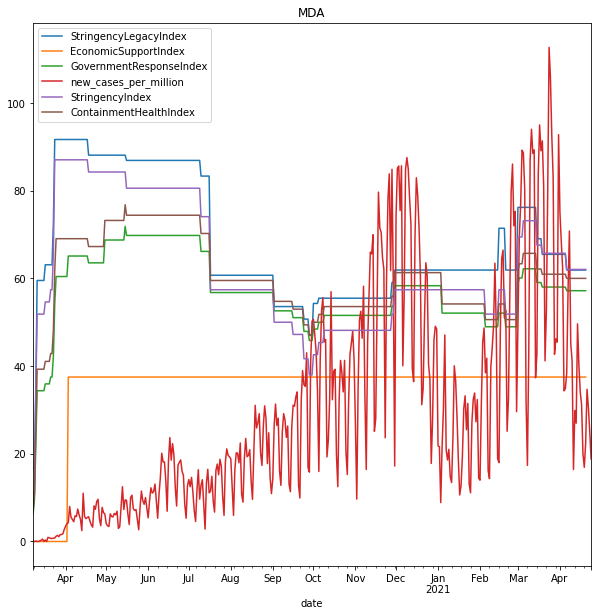

In [7]:
country_code = "MDA"
country = pickup_country_data(owid_oxcgrt, country_code, pred_vars=features_for_train)
country.plot(figsize=(10, 10), title=country_code)

<AxesSubplot:title={'center':'SWE'}, xlabel='date'>

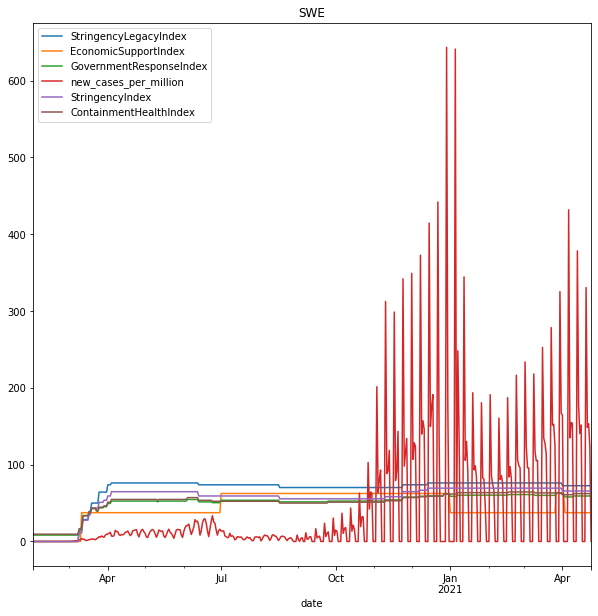

In [8]:
country_code = "SWE"
country = pickup_country_data(owid_oxcgrt, country_code, pred_vars=features_for_train)
country.plot(figsize=(10, 10), title=country_code)

*The possible reasons*?  
1. A lag between the policy and new cases changes
2. These index are kind of "co-linear" as they were aggregated from multiple goverment policies which have similar expected effects on the pandemic.
3. The response variable fluctuates vastly while the index are relatively stable, which brings difficulty to the model to simulate variation.
4. Not every country response to the new daily cases "positively". E.g., SWE kept their policies from the July till the last date (from the dataset).